## Features

In computer vision, one of the common task is to detect and recognize the objects in an image or to capture details in an image which can be further processed by deep learning algorithms to gain insight into an image.

For instance, earlier **Face detection** was carried out using **Haar Cascade Algorithm**, where haar features are applied on top of the face to extract features like eyes, nose and other such details. 

Haar Features are gradient measurements that look at the rectangular region around a certain pixel area and then subtract these areas to calculate the pixel difference. It detects edges, lines and complex rectangular patterns.

There are set of Haar Features which identifies the region of interest on a face and helps in removing the unwanted features from the image, by applying these set of haar features one after another, we reduce the unwanted information and keep only the features related to face.

## Types of Features:



**Edges** 
- Areas in Image where intensity changes abruptly.(Area with High Intensity Gradient)

**Corners**
- Intersection of two edges which looks like corner or sharp points.

**Blobs**
- Region based features; areas of high and low intensity or unique texture.


Among the above feature, if images of same classes are taken, then Corners in the image will be present in both the images, which will help in identifying or classifying the image. So corners are easiest to match because they are unique and act as a good feature.

[Feature Detection](https://en.wikipedia.org/wiki/Feature_detection_(computer_vision))

[Lane Detection](https://towardsdatascience.com/teaching-cars-to-see-advanced-lane-detection-using-computer-vision-87a01de0424f)

[Corner Detection](https://en.wikipedia.org/wiki/Corner_detection)

### Corner Detection

* Using predefined Corner Detector With Harris Algorithm

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

chess_img = cv2.imread("../Images/chess.jpg")
chess_rgb = cv2.cvtColor(chess_img,cv2.COLOR_BGR2RGB)
chess_gray = cv2.cvtColor(chess_rgb,cv2.COLOR_RGB2GRAY)

f_32 = np.float32(chess_gray)

# Detect Corner

dst = cv2.cornerHarris(chess_gray,2,3,0,0.04)
dst_dilate = cv2.dilate(dst,None)

### Finding the strong corners

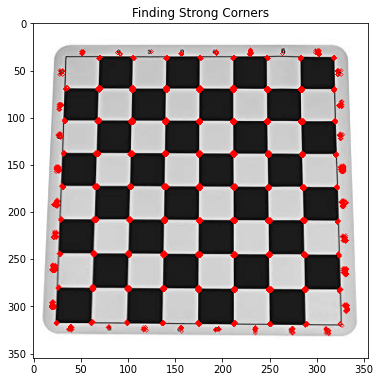

In [2]:
threshold = 0.1*dst.max()
threshold_dilate = 0.1*dst_dilate.max()

image_copy = np.copy(chess_rgb)

for j in range(0,dst.shape[0]):
    for i in range(dst.shape[1]):
        if (dst[j,i] > threshold):
            cv2.circle(image_copy,(i,j),2,(255,0,0),1)

plt.figure(figsize=(6, 8))
plt.title("Finding Strong Corners")
plt.imshow(image_copy)

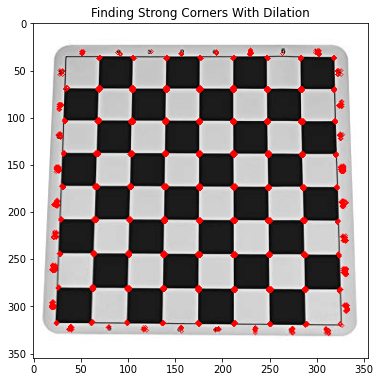

In [3]:
for j in range(0,dst_dilate.shape[0]):
    for i in range(dst_dilate.shape[1]):
        if (dst[j,i] > threshold_dilate):
            cv2.circle(image_copy,(i,j),2,(255,0,0),1)

plt.figure(figsize=(6, 8))
plt.title("Finding Strong Corners With Dilation")
plt.imshow(image_copy)

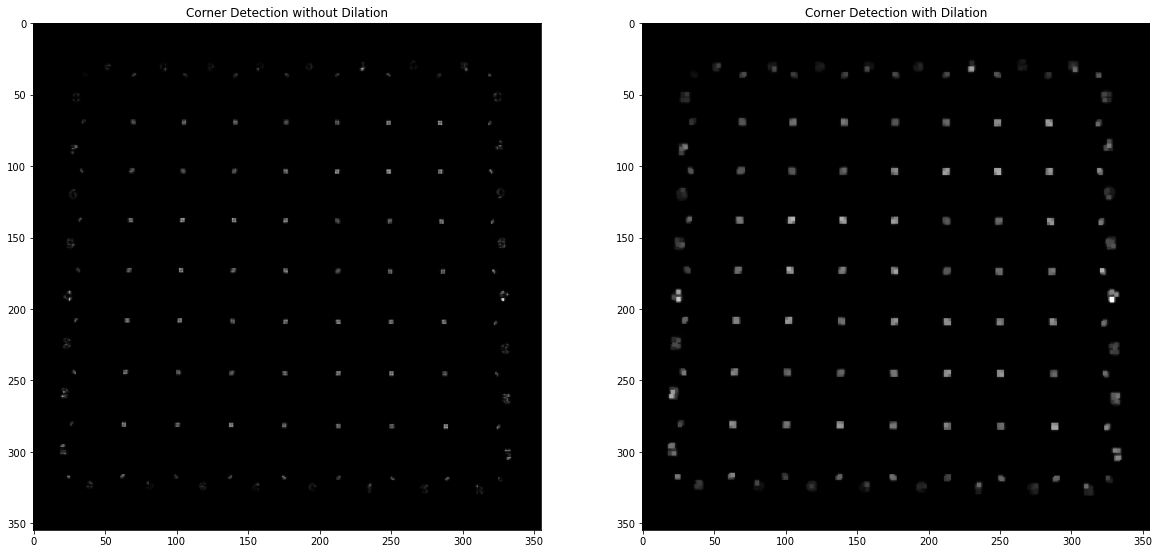

In [4]:
f, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))

ax1.set_title("Corner Detection without Dilation")
ax1.imshow(dst,cmap='gray')

ax2.set_title("Corner Detection with Dilation")
ax2.imshow(dst_dilate,cmap='gray')

## Dilation and Erosion

* Operation is performed on Binary Image and these are morphological operation like contour detection. 

* **Dilation** is applied when you want to enlarge the white bright region in image, by adding pixel to the perceived boundries of the object in the image.

* **Erosion** is applied when you want to shrink the white bright region in image, by removing pixel from the perceived boundries of the object in the image.

### Dilation

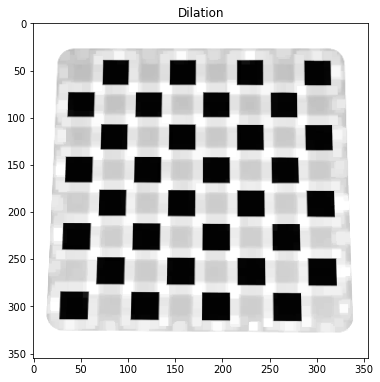

In [5]:
kernel = np.ones((5,5),np.uint8)
dilate_rgb = cv2.cvtColor(chess_img,cv2.COLOR_BGR2RGB)
dilate_gray = cv2.cvtColor(dilate_rgb,cv2.COLOR_RGB2GRAY)
dilated_img = cv2.dilate(dilate_gray,kernel,iterations = 2)
plt.figure(figsize=(6, 8))
plt.title("Dilation")
plt.imshow(dilated_img,cmap='gray')

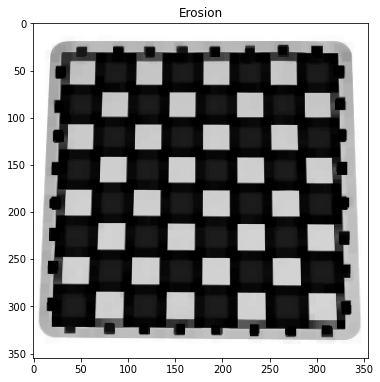

In [6]:
kernel = np.ones((5,5),np.uint8)
erode_rgb = cv2.cvtColor(chess_img,cv2.COLOR_BGR2RGB)
erode_gray = cv2.cvtColor(erode_rgb,cv2.COLOR_RGB2GRAY)
erode_img = cv2.erode(erode_gray,kernel,iterations=2)
plt.figure(figsize=(6, 8))
plt.title("Erosion")
plt.imshow(erode_img,cmap='gray')

### Opening and Closing techniques for the Image Cleaning/Enhancement

- **Opening** refers to erosion followed by dilation, this is useful in noise reduction in which erosion first gets rid of noise (and shrinks the object) then dilation enlarges the object again, but the noise will have disappeared. It is useful in closing small holes inside the foreground objects, or small black points on the object from the previous erosion.

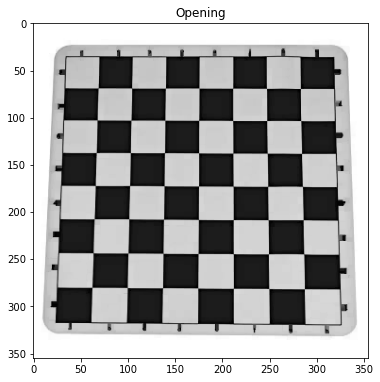

In [7]:
opening = cv2.morphologyEx(erode_gray, cv2.MORPH_OPEN, kernel)
plt.figure(figsize=(6, 8))
plt.title("Opening")
plt.imshow(opening,cmap='gray')

- **Closing** refers to dilation followed by erosion, which is useful in closing small holes or dark areas within an object. It is useful in closing small holes inside the foreground objects, or small black points on the object.

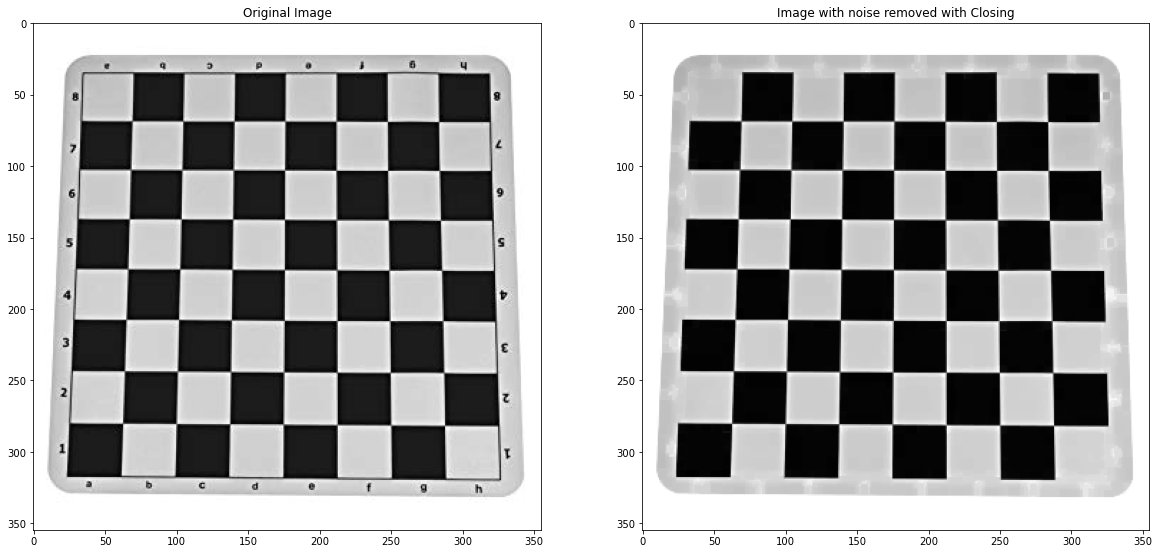

In [8]:
closing = cv2.morphologyEx(erode_gray, cv2.MORPH_CLOSE, kernel)

f, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))

ax1.set_title("Original Image")
ax1.imshow(erode_gray,cmap='gray')

ax2.set_title("Image with noise removed with Closing")
ax2.imshow(closing,cmap='gray')

Using closing technique, we are able to close the black noise around the chess board. Now its upto the user to understand relevant technique that is applicable for their problem.

## Segmentation

- Grouping or segmenting of images into distinct parts is known as Image Segmentation.
     
Previously, we are extracting or detecting features likes edges, corners and such features. And now, we'll apply these smaller concepts to solve broader problem. For instance, self driving cars requires cars to detect traffic lights, lanes, human etc in one frame of image i.e. it has to segment object individually.

**Image Contouring** is a way to segment image, generally the edge detection is used to detect the edges of the object, which is nothing but drastic change in pixel values between bunch of pixels but there will be many incomplete edges on the objects. So for image segmentation we require complete edges around the object.

So image contours are continuous curves that follow edges along the boundary. It provides information about the shape of the object and works well when we have white object against black background.

[Image Contours](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_table_of_contents_contours/py_table_of_contents_contours.html)

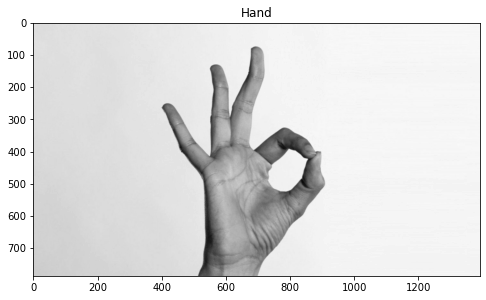

In [9]:
image = cv2.imread("../Images/hand.jpg")
image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image_rgb,cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(8, 10))
plt.title("Hand")
plt.imshow(image_gray,cmap='gray')

- Creating Binary Threshold for the image

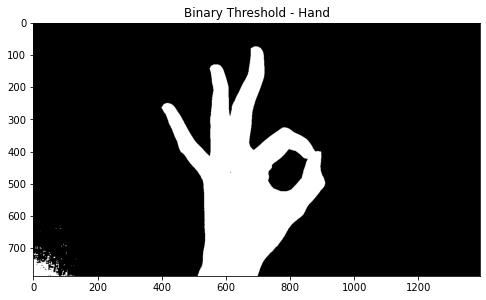

In [10]:
retval, binary = cv2.threshold(image_gray,201,255,cv2.THRESH_BINARY_INV)
plt.figure(figsize=(8, 10))
plt.title("Binary Threshold - Hand")
plt.imshow(binary,cmap='gray')

- **Finding contours from threshold binary image**

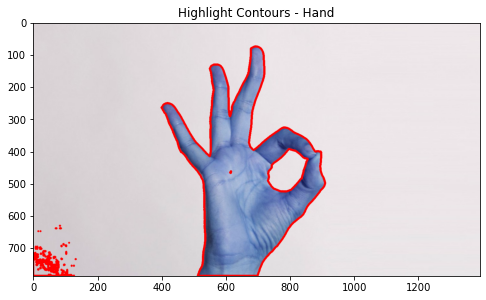

In [11]:
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

all_contours = cv2.drawContours(image, contours, -1, (255,0,0), 5)
plt.figure(figsize=(8, 10))
plt.title("Highlight Contours - Hand")
plt.imshow(all_contours)

Interesting thing to note, Once the contour is drawn over the object, we can calculate number of things about the object i.e. area, perimeter, center etc, all these shape traits are called contour features.

[Contour Properties](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contour_properties/py_contour_properties.html)

**KMeans Clustering**

Kmeans Clustering is widely used in image segmentation. KMeans is unsupervisied machine learning algorithm and here KMeans will cluster the image based on the pixel value i.e. a few random centroid pixel value is taken for the image and based on the centroid value, the pixels will get pulled to the nearest centroids. And mean calculation is done between pixel and centroid, then new centroid is decided. The process repeats itself untill the convergence happens, and each color is segmented and cluster centroid is at the center of the cluster.

[KMeans For Image Segmentation](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_ml/py_kmeans/py_kmeans_opencv/py_kmeans_opencv.html)

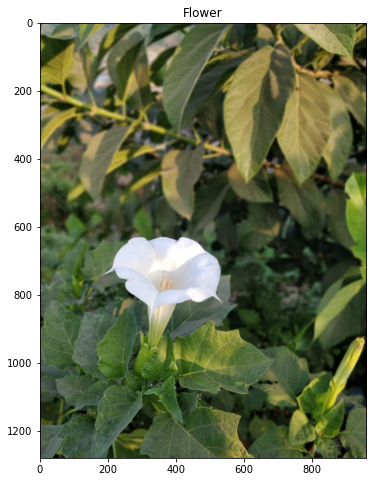

In [12]:
img = cv2.imread('../Images/flower.jpg')
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(8, 8))
plt.title("Flower")
plt.imshow(img_rgb,cmap='gray')

Preparing data for opencv kmeans

- Converting to 2d array of pixels and 3 color channel

In [13]:
pixel_val = img_rgb.reshape((-1,3))
pixel_val = np.float32(pixel_val)

- Stopping criteria for kmeans clustering

In [14]:
criteria = (cv2.TermCriteria_EPS+cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

k=3
retval, labels, centers = cv2.kmeans(pixel_val,k,None,criteria,10, cv2.KMEANS_RANDOM_CENTERS)

#convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

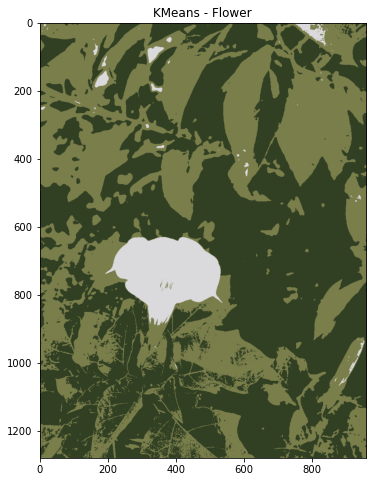

In [15]:
# Reshape back to original image
segmented_img = segmented_data.reshape((img.shape))
label_reshape = labels.reshape(img.shape[0],img.shape[1])
plt.figure(figsize=(8, 8))
plt.title("KMeans - Flower")
plt.imshow(segmented_img)

Now, since I have mentioned the value of k as 3, we found 3 cluster of colors. We can try other values.

### Visualize One Segment

- label_reshape value highlights the cluster alone and blocks out other cluster points by making it black.

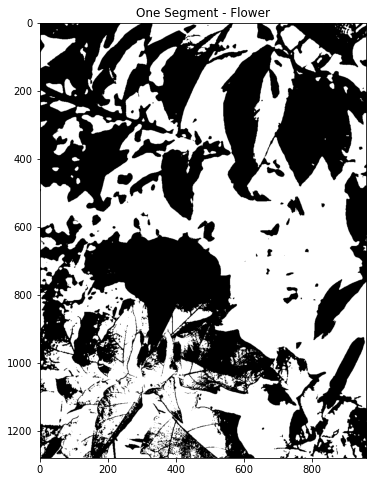

In [16]:
plt.figure(figsize=(8, 8))
plt.title("One Segment - Flower")
plt.imshow(label_reshape==2,cmap='gray')

- Masking the region if required

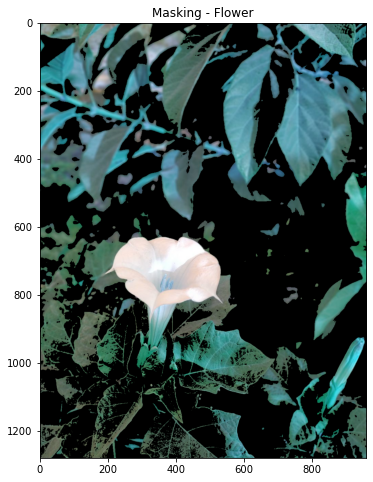

In [17]:
img_copy = np.copy(img)
img_copy[label_reshape==2] = [0,0,0]

plt.figure(figsize=(8, 8))
plt.title("Masking - Flower")
plt.imshow(img_copy)